# HW 8: Routing (Solution)
---
`ISE 754, Fall 2024`

__Assigned:__ Mon, 6 Nov (Individual Assignment)  
__Due:__ 10:00a, Wed, 13 Nov  

Solve questions 1 and 2 by hand (you can submit a scanned copy of your solution, or you can turn in a paper copy in class), and then, for all the questions, use the Code cells in this Jupyter Notebook to answer the questions. Please run all the cells in your notebook and then submit it as a .ipynb file, along with a .html or .pdf copy, via Moodle. (There is a _Run All Cells_ command under the _Run_ menu.)


---
__(1)__ Given the initial location sequence 1, 5, 2, 6, 4, 3, 1 with a total distance of 22, use the table below to determine the final location sequence determined after applying the twoopt improvement procedure by hand to the sequence. The total distance (TD) of each possible of 120 possible sequences is listed in the table. Include the order in which each sequence is considered by the procedure.

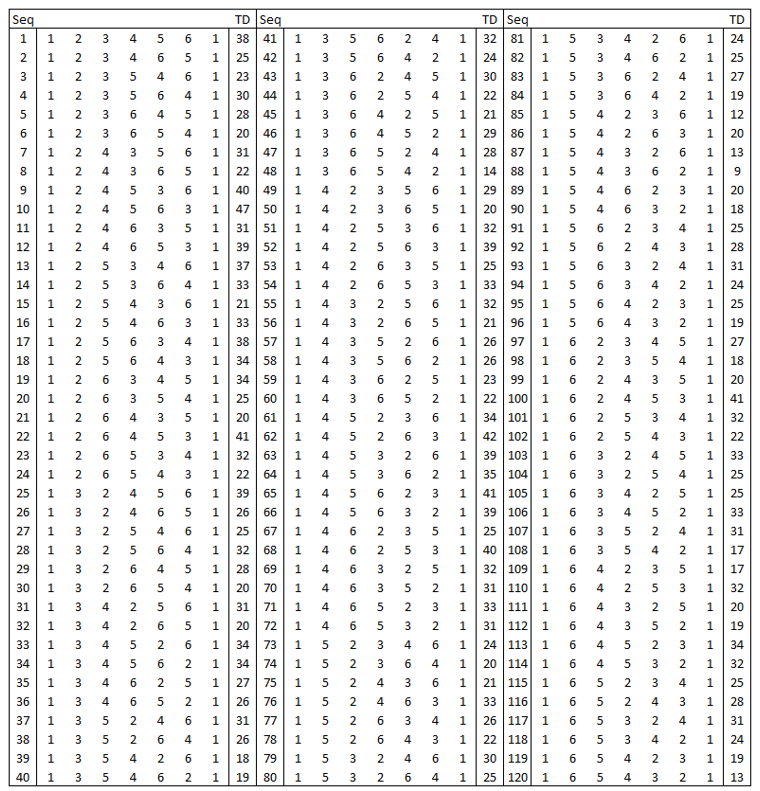

Use the distance data in the following table and `twoopt` to solve the same problem.

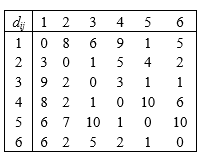

In [1]:
function twoopt_prt(r, rTCh)
    rᵒ, TCᵒ = copy(r), rTCh(r)
    println("*", TCᵒ, ": ", rᵒ)
    done = false
    while !done
        done = true
        for i = 1:length(r)-2
            for j = i+2:min(length(r)-1, length(r)+i-3)
                r′ = vcat(r[1:i], reverse(r[i+1:j]), r[j+1:end])
                TC = rTCh(r′)
                if TC < TCᵒ
                    rᵒ, TCᵒ = r′, TC
                    println("*", TCᵒ, ": ", rᵒ)
                    done = false
                    break
                else
                    println(" ", TC, ": ", r′)
                end
            end
            if done == false
                break
            end
        end
        r = copy(rᵒ)
    end
    return rᵒ, TCᵒ
end

D = [
     0     8     6     9     1     5
     3     0     1     5     4     2
     9     2     0     3     1     1
     8     2     1     0    10     6
     6     7    10     1     0    10
     6     2     5     2     1     0]

segcost(r, C) = map(i -> C[r[i], r[i+1]], 1:length(r) - 1)
rTCh(r) = sum(segcost(r, D))

twoopt_prt([1, 5, 2, 6, 4, 3, 1], rTCh)

*22: [1, 5, 2, 6, 4, 3, 1]
 34: [1, 2, 5, 6, 4, 3, 1]
 22: [1, 6, 2, 5, 4, 3, 1]
 40: [1, 4, 6, 2, 5, 3, 1]
 28: [1, 5, 6, 2, 4, 3, 1]
*20: [1, 5, 4, 6, 2, 3, 1]
 41: [1, 4, 5, 6, 2, 3, 1]
 34: [1, 6, 4, 5, 2, 3, 1]
 41: [1, 2, 6, 4, 5, 3, 1]
 25: [1, 5, 6, 4, 2, 3, 1]
 22: [1, 5, 2, 6, 4, 3, 1]
 25: [1, 5, 3, 2, 6, 4, 1]
 20: [1, 5, 4, 2, 6, 3, 1]
*13: [1, 5, 4, 3, 2, 6, 1]
 39: [1, 4, 5, 3, 2, 6, 1]
 34: [1, 3, 4, 5, 2, 6, 1]
 38: [1, 2, 3, 4, 5, 6, 1]
 24: [1, 5, 3, 4, 2, 6, 1]
 24: [1, 5, 2, 3, 4, 6, 1]
 25: [1, 5, 6, 2, 3, 4, 1]
*12: [1, 5, 4, 2, 3, 6, 1]
 34: [1, 4, 5, 2, 3, 6, 1]
 40: [1, 2, 4, 5, 3, 6, 1]
 39: [1, 3, 2, 4, 5, 6, 1]
 21: [1, 5, 2, 4, 3, 6, 1]
 30: [1, 5, 3, 2, 4, 6, 1]
 31: [1, 5, 6, 3, 2, 4, 1]
 13: [1, 5, 4, 3, 2, 6, 1]
 18: [1, 5, 4, 6, 3, 2, 1]
 20: [1, 5, 4, 2, 6, 3, 1]


([1, 5, 4, 2, 3, 6, 1], 12)

---
__(2)__ A vehicle make forty deliveries in eight hours in a 67-square-mile service area. Assuming that, on average, a vehicle travels at 35 mph (including stops at red lights), estimate the maximum average time (in min) that can be spent dropping off a delivery after reaching a customer.

In [2]:
p, t, v, a, m = 0.9, 8, 35, 67, 40
u = (t*v - p*sqrt(a*m))/(m*v)
println("Max min of time for delivery = ", u*60)

Max min of time for delivery = 10.003206652287377


---
__(3)__ Acme, Inc. has a DC in Detroit, MI that supplies 45 customers each day with cases of different products using tractor-trailer trucks. Given tomorrow’s demand, determine the number of trucks required to supply the customers and the route of each truck. Customer location, load density (in lbs/ft3), and weight (in lbs) of each load for each customer is in `HW8data.csv`. The file includes the location of the depot (customer 1). Each identical truck can (1) carry a maximum of 2,750 cu ft and 25 tons, and (2) must complete its route within 10 total hours (between 7 a.m. and 6 p.m.), including travel and unloading time. The vehicle can be loaded at the depot before 7 a.m. and this loading time should not be included in the 10-hour total. Unloading at each customer takes five minutes for positioning the truck and three minutes per ton of the load. Each vehicle travels at an average speed of 35 mph and actual road distances can be estimated from great circle distances.

__ADD for NEXT TIME:__ Loading time so multiple routes can be assigned to a truck, also need first fit bin packing heuristic (or MILP bin packing if covered)

In [3]:
using Logjam.DataTools, DataFrames, CSV

include("rtefun.jl")

function dgc(xy₁, xy₂; unit=:mi)
    length(xy₁) == length(xy₂) == 2 || error("Inputs must have length 2.")
    unit in [:mi, :km] || error("Unit must be :mi or :km")

    Δx, Δy = xy₂[1] - xy₁[1], xy₂[2] - xy₁[2]
    a = sind(Δy / 2)^2 + cosd(xy₁[2]) * cosd(xy₂[2]) * sind(Δx / 2)^2
    2 * asin(min(sqrt(a), 1.0)) * (unit == :mi ? 3958.75 : 6371.00)
end

Dgc(X₁, X₂) = [dgc(i, j) for i in eachrow(X₁), j in eachrow(X₂)]

df = DataFrame(CSV.File("HW8data.csv"))
first(df, 5)

5×5 DataFrame
 Row │ Customer  Longitude (X)  Latitude (Y)  Density (lbs/cft)  Weight (lbs) 
     │ Int64     Float64        Float64       Float64            Int64        
─────┼────────────────────────────────────────────────────────────────────────
   1 │        1        -83.044        42.433               0.0              0
   2 │        2        -83.088        42.493               5.7           2243
   3 │        3        -83.574        42.574              20.14          4035
   4 │        4        -83.392        42.634              11.94          3573
   5 │        5        -84.451        42.687              14.27          2445

In [4]:
rename!(df, [:e, :LON, :LAT, :s, :wt])
first(df, 5)

5×5 DataFrame
 Row │ e      LON      LAT      s        wt    
     │ Int64  Float64  Float64  Float64  Int64 
─────┼─────────────────────────────────────────
   1 │     1  -83.044   42.433     0.0       0
   2 │     2  -83.088   42.493     5.7    2243
   3 │     3  -83.574   42.574    20.14   4035
   4 │     4  -83.392   42.634    11.94   3573
   5 │     5  -84.451   42.687    14.27   2445

In [5]:
maxpayld(sh, tr) = min(tr.Kwt, sh.s*tr.Kcu/2000)

tr = (b = 1, e = 1, Kwt = 25, Kcu = 2750)
sh = df[2:end, :]
sh.b .= 1
sh.q .= sh.wt./2000
sh.qmax .= map(sh -> maxpayld(sh, tr), eachrow(sh))
first(sh, 5)

5×8 DataFrame
 Row │ e      LON      LAT      s        wt     b      q        qmax    
     │ Int64  Float64  Float64  Float64  Int64  Int64  Float64  Float64 
─────┼──────────────────────────────────────────────────────────────────
   1 │     2  -83.088   42.493     5.7    2243      1   1.1215   7.8375
   2 │     3  -83.574   42.574    20.14   4035      1   2.0175  25.0
   3 │     4  -83.392   42.634    11.94   3573      1   1.7865  16.4175
   4 │     5  -84.451   42.687    14.27   2445      1   1.2225  19.6212
   5 │     6  -84.373   42.338     1.6    2746      1   1.373    2.2

In [6]:
# Check for weight and cube feasibility to determine shipments to split
# Note: not checking for time feasibility since no way to repair
@show idxsplit = findall(sh.q .> sh.qmax)
changed_rows = DataFrame()
for i in idxsplit
    push!(sh, sh[i, :])
    sh[end, :q] = sh[i, :q] - sh[i, :qmax]
    sh[i, :q] = sh[i, :qmax]
    push!(changed_rows, sh[i, :], sh[end, :])
end
sh.tU .= 5/60 .+ 3sh.q./60   # Need to wait until after split since q changing
changed_rows

idxsplit = findall(sh.q .> sh.qmax) = [10]


2×8 DataFrame
 Row │ e      LON      LAT      s        wt     b      q        qmax    
     │ Int64  Float64  Float64  Float64  Int64  Int64  Float64  Float64 
─────┼──────────────────────────────────────────────────────────────────
   1 │    11   -83.37   42.493     1.17   3269      1  1.60875  1.60875
   2 │    11   -83.37   42.493     1.17   3269      1  0.02575  1.60875

In [7]:
include("rtefun.jl")

function rTCh(rte)
    rTT = rteTC(rte, sh, T, tr)
    rTT += sum(sh.tU[unique(rte)])
    timefeas = rTT < maxtime
    idxsh = unique(rte)
    wtfeas = sum(sh.q[idxsh]) <= tr.Kwt
    cufeas = sum(2000sh.q[idxsh]./sh.s[idxsh]) <= tr.Kcu 
    return timefeas && wtfeas && cufeas ? rTT : Inf
end

maxtime, v = 10, 35

XY = hcat(df.LON, df.LAT)
D = Dgc(XY, XY) * 1.2
T = D/v

rte = savings(rTCh, sh)
rte = [twoopt(r, rTCh)[1] for r in rte]
TT = [rTCh(r) for r in rte]
sum(TT)

30.236884813247197

In [8]:
Wt = [sum(sh.q[unique(r)]) for r in rte]
Cu = [sum(2000sh.q[idxsh]./sh.s[idxsh] for idxsh in unique(r)) for r in rte]
Rt = [r[.!isorigin(r)] for r in rte]   # Only include destinations since peddling 
out = DataFrame(Time=TT, Weight=Wt, Cube=Cu, Route=Rt)

10×4 DataFrame
 Row │ Time      Weight    Cube     Route                        
     │ Float64   Float64   Float64  Array…                       
─────┼───────────────────────────────────────────────────────────
   1 │ 2.84053    9.031    2719.67  [13, 44, 3, 30, 36]
   2 │ 6.73835    9.8685   2742.43  [2, 17, 29, 4, 6, 14]
   3 │ 5.53519    5.86875  2718.44  [46, 7, 5, 34, 21]
   4 │ 2.35489    8.953    2622.02  [15, 39, 9, 35, 16, 31]
   5 │ 1.33812    1.60875  2750.0   [10]
   6 │ 0.602936   3.6075   2451.99  [18, 11]
   7 │ 3.9377     6.5225   2643.91  [19, 33, 20, 12, 32]
   8 │ 3.09195   11.95     2413.22  [45, 25, 40, 43, 22, 26, 41]
   9 │ 1.05723    4.1075   1762.1   [42, 24, 1]
  10 │ 2.74       9.6965   2694.37  [37, 27, 28, 23, 8, 38]

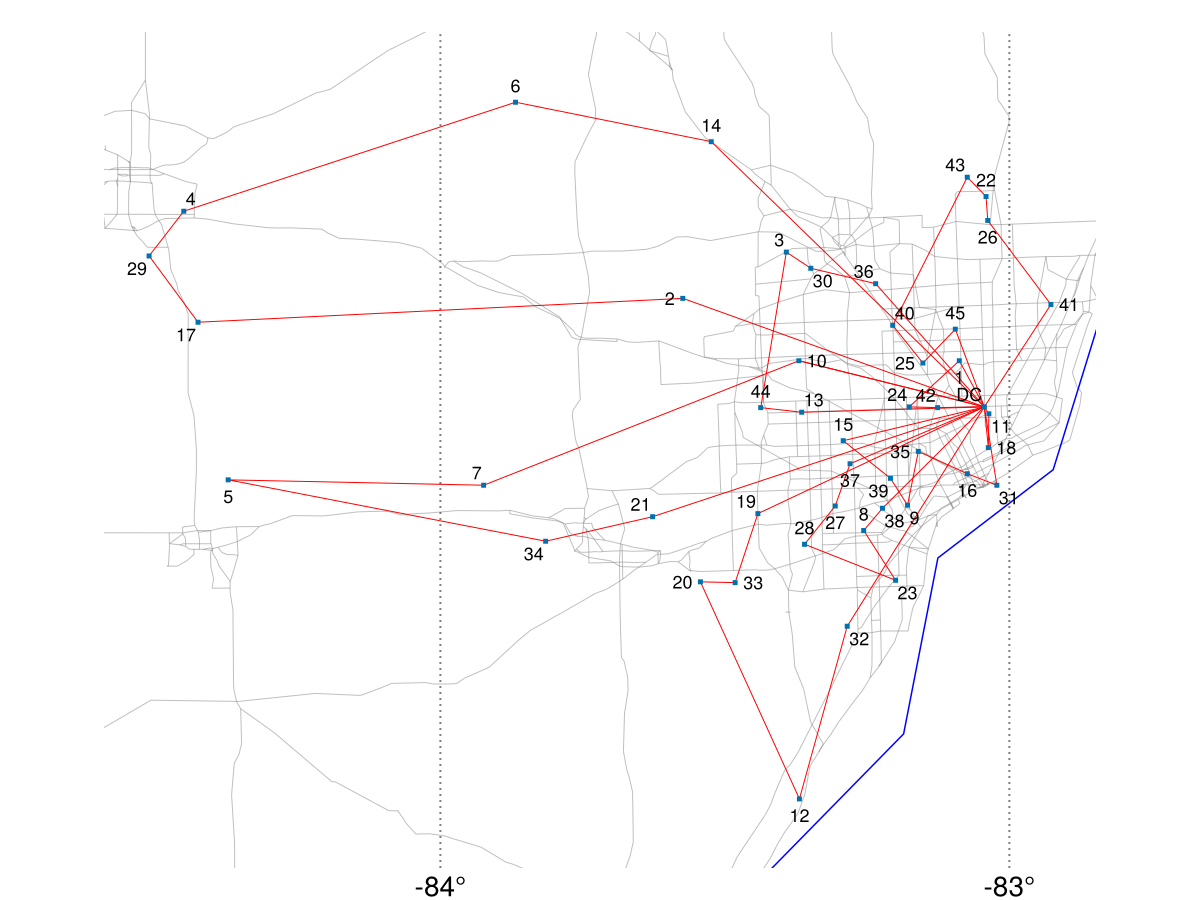

In [9]:
using CairoMakie, Logjam.MapTools

x, y = df.LON, df.LAT
fig, ax = makemap(x, y; xexpand=0.05)
for ri = rte
    loc = rte2loc(ri, sh, tr)
    lines!(ax, x[loc], y[loc], color=:red, linewidth=.5)
end
scatter!(ax, x, y; marker='.', markersize=24)
x, y = vcat(x[1], x[sh.e]), vcat(y[1], y[sh.e])  # Redefine for DC and shmt indices
pop!(x), pop!(y)                                 # Remove added split shmt
text!(ax, x, y, text=vcat("DC", string.(1:nrow(sh)-1)); fontsize=9, aligntext(x, y)...)
fig